In [1]:
include("trapezium.jl")
using Plots, LaTeXStrings

This notebook example uses the argument principle to count and find zeros of the analytic function
$$
f(z) = \sin(z-1) + \cos(4z) + e^{3z}.
$$
Initially, we will define our function $f$ and perform a suitable change of variables to integrate around the circle.

In [3]:
# function with unknown zeros:
f(z) = sin(z-1) + cos(4z) + exp(3z)

# its derivative
df_dz(z) = cos(z-1) - 4sin(4z) + 3exp(3z)

df_dz (generic function with 1 method)

In [4]:
# change integration variable
z(r,θ,z₀) = z₀ + r*exp(im*θ)
dz_dθ(r,θ) = im*r*exp(im*θ)

# default to unit circle to simplify syntax
z(θ) = z(1,θ,0)
dz_dθ(θ) = dz_dθ(1,θ)

# resulting integrand of argument principle
F(θ) = (1/(2π*im)) * df_dz(z(θ))/f(z(θ)) * dz_dθ(θ)

F (generic function with 1 method)

Let's assume that there are no zeros on the unit circle, and apply the argument principle, which says that
$$
I = \frac{1}{2\pi i}\int_{|z|=1}\frac{f'(z)}{f(z)} dz = \int_0^{2\pi} F(\theta) d\theta
$$
is equal to the number of zeros inside the unit circle. We will use the trapezium rule, as this will converge exponentially fast.

In [6]:
# test for a smallish number of points
println("15-point trapezium rule estimates the number of zeros as: ",
        trap(F, 15, periodic=true))

15-point trapezium rule estimates the number of zeros as: 3.009675822582812 - 3.4097361544549064e-16im


We know the answer is an integer, and it's looking likely to be $3$. Let's perform a numerical test to check if the midpoint approximation converges to $3$.

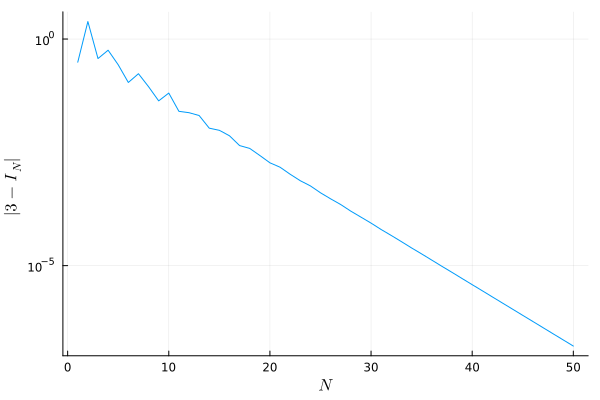

In [8]:
N_range = 1:50 # range of points to apply trapezium rule

#initialise blank vector of approximations
count_ests = zeros(ComplexF64, length(N_range))

# record estimate for each N
for N ∈ N_range
    count_ests[N] = trap(F, N, periodic=true)
end

#plot the difference between the estimates and 3
plot(N_range, abs.(3 .- real.(count_ests)),
                xlabel=L"N",
                ylabel=L"|3-I_N|",
                yaxis=:log, labels="")

Now let's plot the $\log|f|$ in the unit circle and look for large negative values, as a (more computationally expensive) rough way of looking for zeros. 

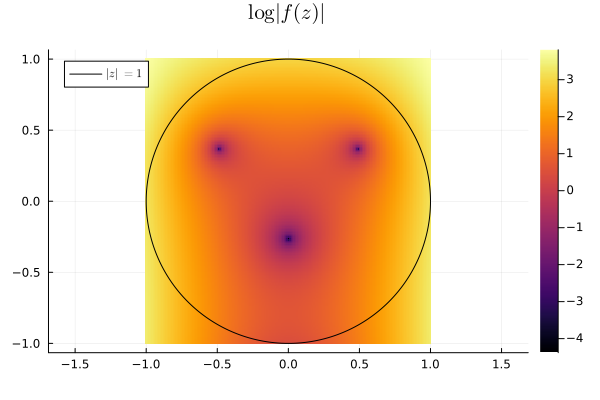

In [10]:
r = 1.0
δ = 0.01
t = -r:δ:r
z_vals = t .+ (im*t')
heatmap(t, t, log.(abs.(f.(z_vals))))
plot!(real(z.(0:δ:2π)),
        imag(z.(0:δ:2π)),
        color=:black,
        label=L"$|z|=1$",title=L"$\log|f(z)|$",
        aspect_ratio=1)

We see that there are definitely three zeros! Now let's use the argument principle again, to get the value of the zero in the left half-plane. Start by putting a smaller ball around that one:

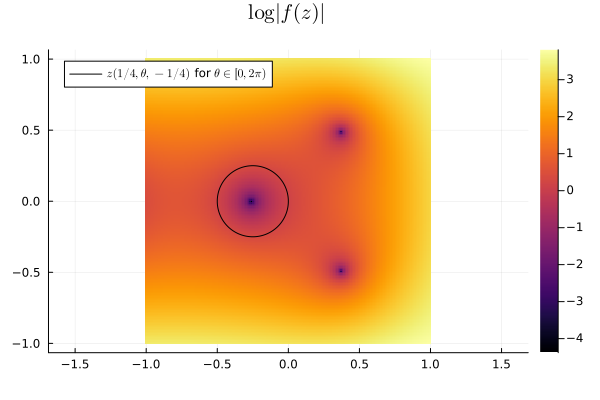

In [12]:
heatmap(t, t, log.(abs.(f.(z_vals)))')
r = 1/4
z₀ = -1/4
plot!(real(z.(r,0:δ:2π,z₀)),
    imag(z.(r,0:δ:2π,z₀)),
    color=:black,
    label=L"$z(1/4,\theta,-1/4)$ for $\theta\in[0,2\pi)$",
    title=L"$\log|f(z)|$",
    aspect_ratio=1)

Now use these values of $r,z_0$ to construct the circle that we search inside. As we expect there is just one zero in here, we can modify the argument principle slightly, to find this zero $z_0$ such that $f(z_0)=0$:
$$
z_0 = \frac{1}{2\pi}\oint_\gamma \frac{f'(z)}{f(z)} z ~dz = \int_0^{2\pi} G(\theta) ~d\theta
$$
In terms of the theorem statement, this returns the value of $g(z)=z$ at $z_0$, i.e. the zero $z_0$.

In [14]:
# resulting integrand of argument principle
G(θ) = (1/(2π*im)) * df_dz(z(r,θ,z₀))/f(z(r,θ,z₀)) * dz_dθ(r,θ) * z(r,θ,z₀)

G (generic function with 1 method)

In [15]:
# now we know there is just one zero, we can estimate it using the argument principle:
println("100-point trapezium rule estimates the zero as: ", trap(G, 100))

100-point trapezium rule estimates the zero as: -0.2624416049064458 - 6.906480170210255e-17im


Finally, we compute the $N$-point trapezium rule approximation to $z_0^{(N)}$, and measure the convergence of residual error $|f(z_0^{(N)})|$ (as we do not know the exact value of $z_0$)

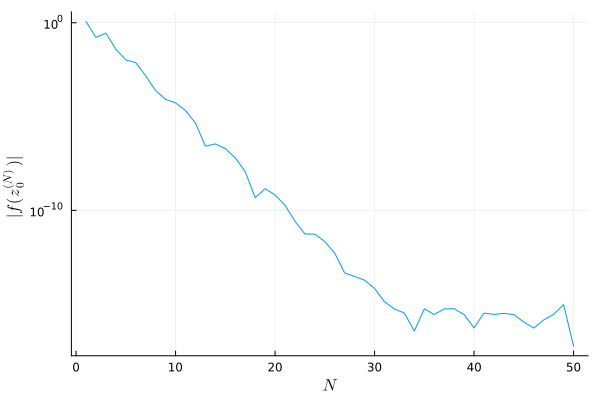

In [17]:
# resulting integrand of argument principle
G(θ) = (1/(2π*im)) * df_dz(z(r,θ,z₀))/f(z(r,θ,z₀)) * dz_dθ(r,θ) * z(r,θ,z₀)

# evaluate using trapezium rule
N_range = 1:50
zero_ests = zeros(ComplexF64, length(N_range))
for N ∈ N_range
    zero_ests[N] = trap(G, N, periodic=true)
end
plot(N_range, abs.(f.(zero_ests)),
    xlabel=L"N",
    ylabel=L"|f(z^{(N)}_0)|",
    yaxis=:log,
    labels="")


Reading off the above chart, we observe close to machine (residual) error ($10^{-16}$) with $N=33$

In [19]:
println("100-point trapezium rule estimates the zero as: ", f(trap(G, 33)))

100-point trapezium rule estimates the zero as: 3.3306690738754696e-16 - 2.0611634816863823e-17im
